# This notebook demonstarates the radiation algorithm on the camels data:

In [64]:
## The main goal is to demonstrate sensitivity of eq.38 from
## ref.: Allen R.G., Trezza R., Tasumi, Masahiro. Analytical integrated functions for daily solar radiation on slopes.
## // Agricultural and Forest Meteorology 139 (2006) 55–73

### Importing all necessary classes

In [65]:
from matplotlib import pyplot as plt
from datetime import datetime
from shyft import api
from shyft.time_series import (Calendar,deltahours,UtcPeriod,TimeSeries,TimeAxis,DoubleVector,point_interpretation_policy)
import seaborn as sns
import numpy as np

In [66]:
from camels_reader import TestData

In [67]:
data = TestData()
time_vec = api.UtcTimeVector(data.time)
time_end = time_vec[-1] + 60*60*24
ta = api.TimeAxisByPoints(time_vec, t_end=time_end)
station_info, df = data._get_met_data_from_camels_database()

In [68]:
# Radiaiton runner helps to run and plot radiaiton routine results
from radiation_runner import RadiationRunner
runner = RadiationRunner()
def plot_results(xvar, yvar, fig1, ax1, ymax, xname, yname, plotname, lab, col, labloc, ymin=0.0):
    """ Plots things"""
    ax1.plot(xvar, yvar, col, label=lab)
    ax1.set_ylabel(yname)
    ax1.set_xlabel(xname)
    plt.title(plotname)
    plt.legend(loc=labloc, bbox_to_anchor=(1,0.5))
    plt.axis([0, 365, ymin, int(ymax * 1.01)])
    plt.grid(True)

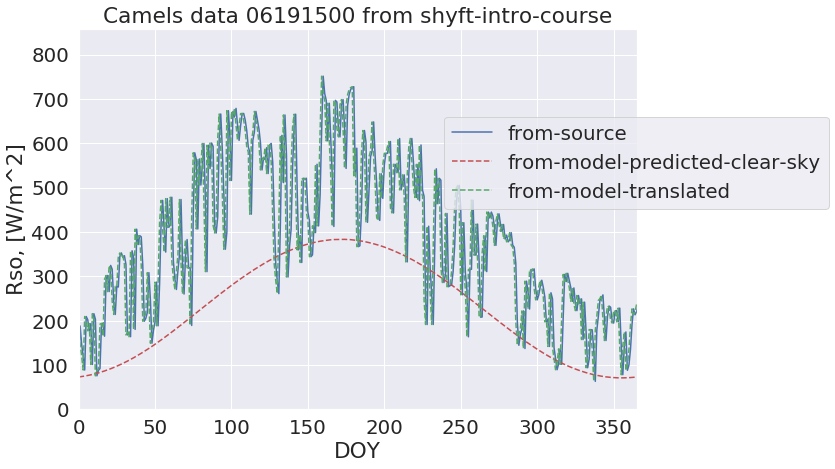

In [69]:
# This is result of calculation from pure camels data, assuming that radiation is measured on horizontal surface
#
latitude_deg = station_info['lat']
slope_deg = 0.0
aspect_deg = 0.0
elevation= station_info['z']
albedo = 0.5
turbidity = 0.5
ymax = 850
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Camels data 06191500 from shyft-intro-course"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m')
labloc = ("upper left","lower center", "upper center","center left")

sns.set(font_scale=1.8)
fig1, ax1 = plt.subplots(figsize=(10, 7))

result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax1.plot(data.radiation, label='from-source')
plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'from-model-predicted-clear-sky', colors[0],labloc[1])
plot_results(result[0], result[3], fig1, ax1, ymax, xname, yname, plotname, 'from-model-translated', colors[4],labloc[1])

### Here we can see how the eq.38 actually reacts on topography and other input changes. 

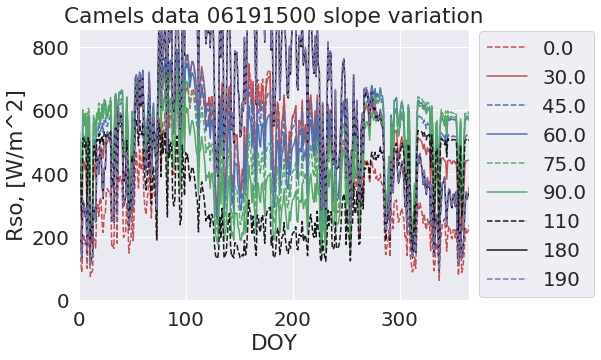

In [70]:
#### The other notebook (radiation_sensitivity) shows only clear-sky radiation behavior
# Now lets play around with aspect, slope, albedo, turbidity 
fig1, ax1 = plt.subplots(figsize=(7, 5))
slope_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
aspect_deg = 0.0
plotname = "Camels data 06191500 slope variation"
i = 0
for slope_deg in slope_array:
    result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
    plot_results(result[0], result[3], fig1, ax1, ymax, xname, yname, plotname, str(slope_deg), colors[i],labloc[3])
    i+=1

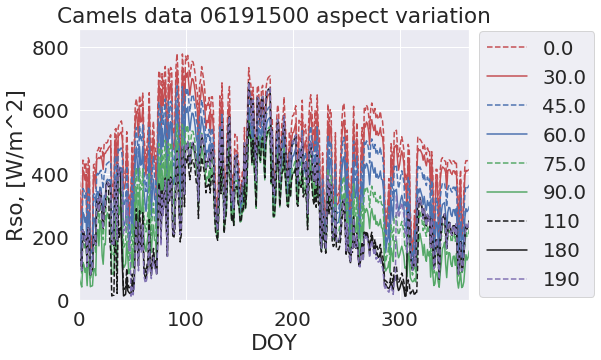

In [71]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
aspect_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
slope_deg = 30.0 # if slope is 0 no aspect impact could be seen
i = 0
plotname = "Camels data 06191500 aspect variation"
for aspect_deg in aspect_array:
    result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
    plot_results(result[0], result[3], fig1, ax1, ymax, xname, yname, plotname, str(aspect_deg), colors[i],labloc[3])
    i+=1

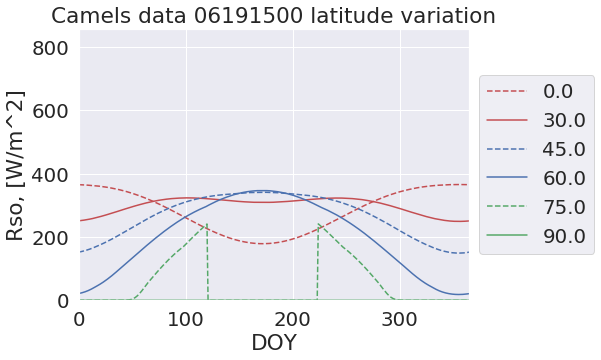

In [72]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
lat_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0]
slope_deg = 30.0 # if slope is 0 no aspect impact could be seen
aspect_deg = 30.0
i = 0
plotname = "Camels data 06191500 latitude variation"
for latitude_deg in lat_array:
    result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(latitude_deg), colors[i],labloc[3])
    i+=1


### The rest shows very minor impact on the translated radiation, 

In [73]:
### which is kind of expected, as the measured radiation is considered a main source of information. 
### See the radition-sensitivity notebook for impact on theoretical values

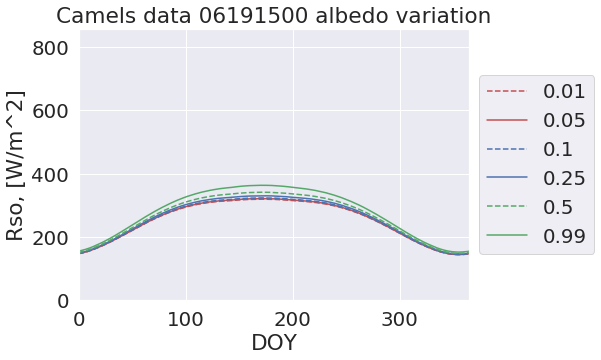

In [74]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
albedo_array = [0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
slope_deg = 30.0 # if slope is 0 no aspect impact could be seen
aspect_deg = 30.0
latitude_deg = station_info['lat']
i = 0
plotname = "Camels data 06191500 albedo variation"
for albedo in albedo_array:
    result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(albedo), colors[i],labloc[3])
    i+=1

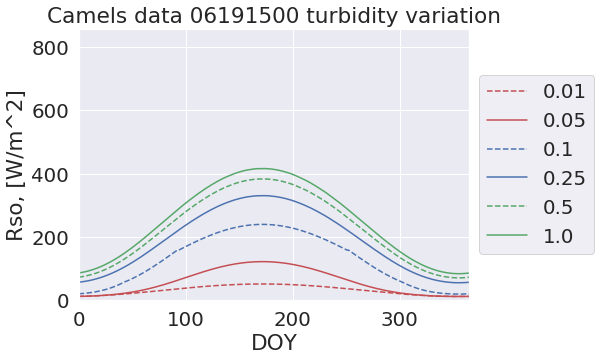

In [75]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
turbidity_array = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
slope_deg = 0.0 # if slope is 0 no aspect impact could be seen
aspect_deg = 0.0
albedo = 0.5
latitude_deg = station_info['lat']
i = 0
plotname = "Camels data 06191500 turbidity variation"
for turbidity in turbidity_array:
    result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(turbidity), colors[i],labloc[3])
    i+=1

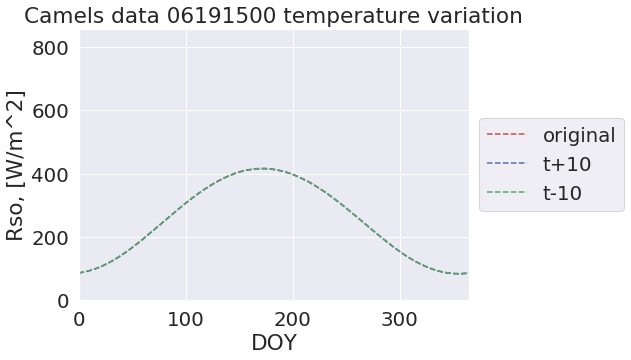

In [76]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
turbidity_array = 0.5
slope_deg = 0.0 # if slope is 0 no aspect impact could be seen
aspect_deg = 0.0
albedo = 0.5
temp_plus10 = np.array([c+10 for c in data.temperature])
temp_minus10 = np.array([c-10 for c in data.temperature])
latitude_deg = station_info['lat']
i = 0
plotname = "Camels data 06191500 temperature variation"
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
result1 = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temp_plus10, data.relative_humidity, '24-hour', data.radiation)
result2 = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temp_minus10, data.relative_humidity, '24-hour', data.radiation)

plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'original', colors[0],labloc[3])
plot_results(result1[0], result1[2], fig1, ax1, ymax, xname, yname, plotname, 't+10', colors[2],labloc[3])
plot_results(result2[0], result2[2], fig1, ax1, ymax, xname, yname, plotname, 't-10', colors[4],labloc[3])



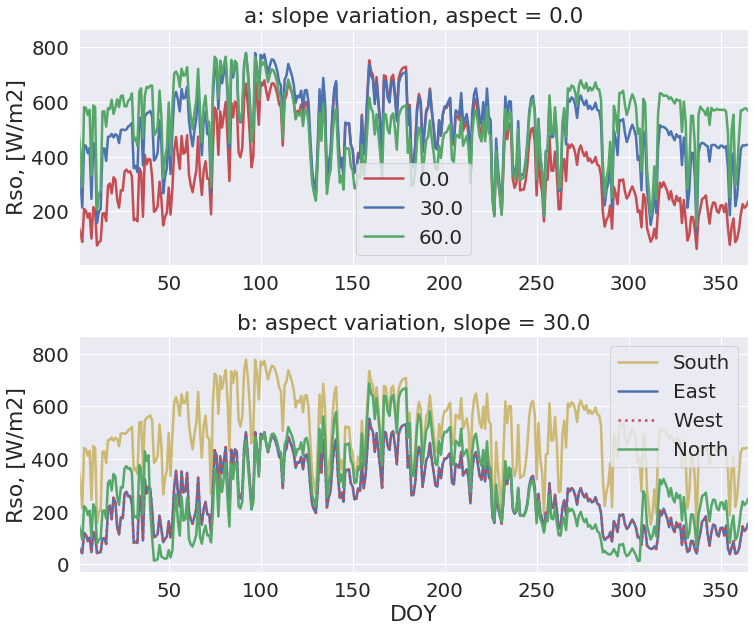

In [77]:
sns.set(font_scale=1.8)
fig = plt.figure(figsize=(12, 10))
# plt.title('Station 06191500 of Camels data, year 1980')
from matplotlib import gridspec
gs = gridspec.GridSpec(nrows=2,
                       ncols=1,
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1,1],
                       wspace= 0.5,
                       hspace=0.3)

ax1 = fig.add_subplot(gs[0,0])
ax1.set_ylabel('Rso, [W/m2]',fontsize=22)
ax1.set_title('a: slope variation, aspect = 0.0')
ax1.set_xlim([1, 365])
ax2 = fig.add_subplot(gs[1,0])
ax2.set_ylabel('Rso, [W/m2]',fontsize=22)
ax2.set_title('b: aspect variation, slope = 30.0')
ax2.set_xlabel('DOY',fontsize=22)
ax2.set_xlim([1, 365])
colors = ('--r','r', '--b','b','--g','g','--k','k','--m','m')
lines = ('-','--')
slope_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
aspect_deg = 0.0
plotname = "Camels data 06191500 slope variation"
i = 0
ymin = 0.0
ymax = 800.0
slope_deg = 0.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax1.plot(result[0], result[3],color=colors[1],lw=2.5,label=str(slope_deg))
slope_deg = 30.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax1.plot(result[0], result[3],color=colors[3],lw=2.5,label=str(slope_deg))
slope_deg = 60.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax1.plot(result[0], result[3],color=colors[5],lw=2.5,label=str(slope_deg))
ax1.legend()
# lines = []
# labels_slope=[str(c) for c in slope_array]
# for slope_deg in slope_array:
#     result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
#     radplt = ax1.plot(result[0], result[2],label=str(slope_deg))
#     lines+=radplt
#     # fig.legend(loc=labloc, bbox_to_anchor=(1,0.5))
#     
#     i+=1 # 
# labels= [l.get_labels() for l in lines]
# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles, labels)

slope_deg = 30.0
aspect_deg = 0.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax2.plot(result[0], result[3],'y',lw=2.5,label='South')
aspect_deg = -90.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax2.plot(result[0], result[3],colors[3],lw=2.5,label='East')
aspect_deg = 90.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax2.plot(result[0], result[3],c='r',lw=2.5,ls=':',label='West')
aspect_deg = 180.0
result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
ax2.plot(result[0], result[3],colors[5],lw=2.5,label='North')
ax2.legend()

# aspect_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
# for aspect_deg in aspect_array:
#     result = runner.run_radiation_ta(ta,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, data.temperature, data.relative_humidity, '24-hour', data.radiation)
#     ax2.plot(result[0], result[2],label=str(aspect_deg))
#     # ax2.legend(loc=labloc, bbox_to_anchor=(1,0.5))
#     i+=1
fig.savefig('radiation_camels.jpg')